In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from matplotlib.markers import TICKDOWN

In [28]:
kras_count_sample = pd.read_csv("../GENIE_data/GENIE_v8/genie_v8_kras_mutation_count_sample.csv", index_col=0)
kras_count_sample
#row names are specific samples

,KRAS_COUNT,PATIENT_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED,CENTER,SEX,PRIMARY_RACE,ETHNICITY,CENTER.1
GENIE-COLU-00079-01,1,GENIE-COLU-00079,74,COAD,Primary,COLU-CCCP-V1,Colorectal Cancer,Colon Adenocarcinoma,Primary tumor,COLU,Female,Unknown,Unknown,COLU
GENIE-COLU-00086-01,1,GENIE-COLU-00086,65,READ,Metastasis,COLU-CCCP-V1,Colorectal Cancer,Rectal Adenocarcinoma,Lymph node metastasis,COLU,Female,Black,Non-Spanish/non-Hispanic,COLU
GENIE-COLU-00100-01,1,GENIE-COLU-00100,59,COAD,Primary,COLU-CCCP-V1,Colorectal Cancer,Colon Adenocarcinoma,Primary tumor,COLU,Male,Unknown,Unknown,COLU
GENIE-COLU-00179-01,1,GENIE-COLU-00179,31,COADREAD,Metastasis,COLU-CCCP-V1,Colorectal Cancer,Colorectal Adenocarcinoma,Distant organ metastasis,COLU,Female,Asian,Unknown,COLU
GENIE-COLU-00195-01,0,GENIE-COLU-00195,84,READ,Unspecified,COLU-CCCP-V1,Colorectal Cancer,Rectal Adenocarcinoma,Not otherwise specified,COLU,Male,Unknown,Unknown,COLU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GENIE-YALE-TPL648-1,1,GENIE-YALE-TPL648,47,COAD,Metastasis,YALE-OCP-V3,Colorectal Cancer,Colon Adenocarcinoma,Distant organ metastasis,YALE,Male,White,Non-Spanish/non-Hispanic,YALE
GENIE-YALE-TPL75-1,0,GENIE-YALE-TPL75,58,COADREAD,Metastasis,YALE-HSM-V1,Colorectal Cancer,Colorectal Adenocarcinoma,Distant organ metastasis,YALE,Male,Unknown,Non-Spanish/non-Hispanic,YALE
GENIE-YALE-TPL82-1,0,GENIE-YALE-TPL82,62,COAD,Primary,YALE-HSM-V1,Colorectal Cancer,Colon Adenocarcinoma,Primary tumor,YALE,Female,White,Non-Spanish/non-Hispanic,YALE
GENIE-YALE-TPL91-1,1,GENIE-YALE-TPL91,72,READ,Primary,YALE-HSM-V1,Colorectal Cancer,Rectal Adenocarcinoma,Primary tumor,YALE,Male,White,Non-Spanish/non-Hispanic,YALE


In [29]:
#Shows the different types of Samples: Metastasis, NA, Not collected, Primary, Unspecified
#Second array shows the number of each type in the same order
#If using a jupyter notebook, can change "SAMPLE_TYPE" to the name of any column listed
print(kras_count_sample.columns)
print( np.unique(kras_count_sample["SAMPLE_TYPE"], return_counts=True) )

Index(['KRAS_COUNT', 'PATIENT_ID', 'AGE_AT_SEQ_REPORT', 'ONCOTREE_CODE',
       'SAMPLE_TYPE', 'SEQ_ASSAY_ID', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED',
       'SAMPLE_TYPE_DETAILED', 'CENTER', 'SEX', 'PRIMARY_RACE', 'ETHNICITY',
       'CENTER.1'],
      dtype='object')
(array(['Metastasis', 'Not Applicable or Heme', 'Not Collected', 'Primary',
       'Unspecified'], dtype=object), array([3215,   77,   82, 5984,   37]))


In [30]:
kras_count_patient = pd.read_csv("../GENIE_data/GENIE_v8/genie_v8_kras_mutation_count_patient.csv", index_col=0)
kras_count_patient
#row names are patient

,KRAS_MUT,SEX,PRIMARY_RACE,ETHNICITY,CENTER,NUM_SAMP,SAMP_CONSIS
GENIE-VICC-102225,False,Female,White,Non-Spanish/non-Hispanic,VICC,1,True
GENIE-VICC-108156,True,Female,White,Non-Spanish/non-Hispanic,VICC,1,True
GENIE-VICC-111844,True,Female,White,Unknown,VICC,1,True
GENIE-VICC-113062,False,Male,White,Unknown,VICC,1,True
GENIE-VICC-114230,False,Female,Black,Non-Spanish/non-Hispanic,VICC,1,True
...,...,...,...,...,...,...,...
GENIE-PHS-c28542d1,True,Female,White,Spanish/Hispanic,PHS,1,True
GENIE-PHS-d186889f,False,Female,Asian,Spanish/Hispanic,PHS,1,True
GENIE-PHS-f2586482,False,Male,White,Spanish/Hispanic,PHS,1,True
GENIE-PHS-f53567c6,True,Male,White,Spanish/Hispanic,PHS,1,True


In [31]:
#NUM_SAMP column tells how many samples were collected for that patient
#SAMP_CONSIS column tells if these samples were consistent in the number of KRAS mutations for the patient
#Below code shows that out of the 301 patients that have multiple samples, 
    #271 have consistent KRAS mutation status with regards to number of KRAS mutations. 
    #NOTE: This will miss if sampleA has one mutation and sampleB has different mutation, but still only one

print( sum(kras_count_patient[ kras_count_patient["NUM_SAMP"] > 1 ]["SAMP_CONSIS"]) )
print( kras_count_patient[ kras_count_patient["NUM_SAMP"] > 1 ].shape[0] )

271
301


In [32]:
#Percent of colorectal patients with KRAS mutations?
sum( kras_count_patient["KRAS_MUT"] ) / kras_count_patient.shape[0]

0.4399691017435445

Number on TOP of bars is total number of patients in subgroup
Number IN bars is number of patients with KRAS mutation in subgroup


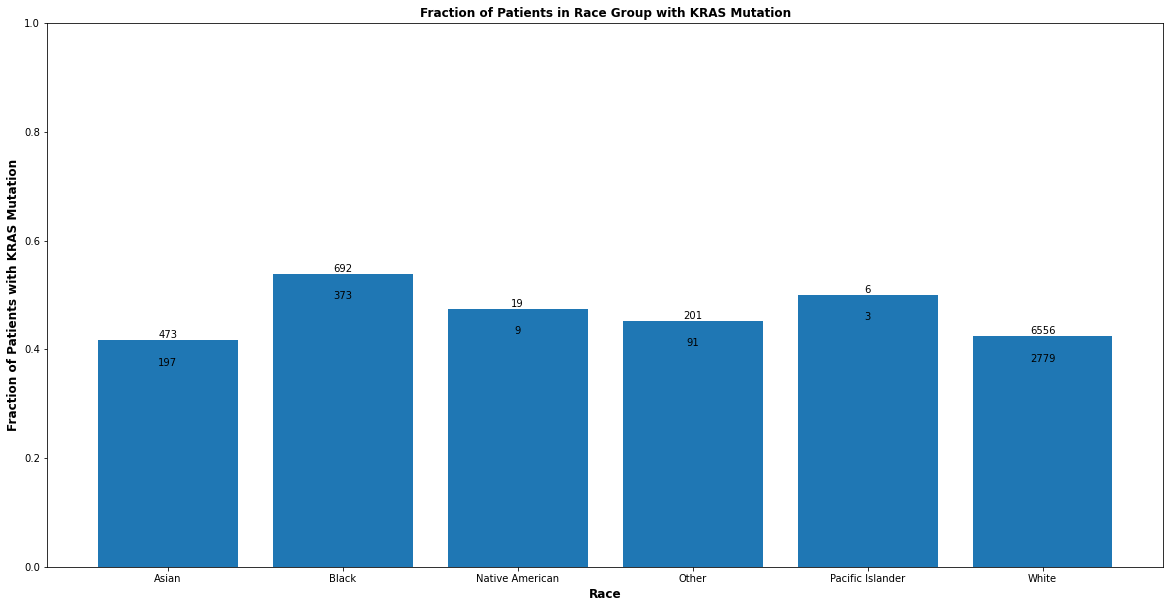

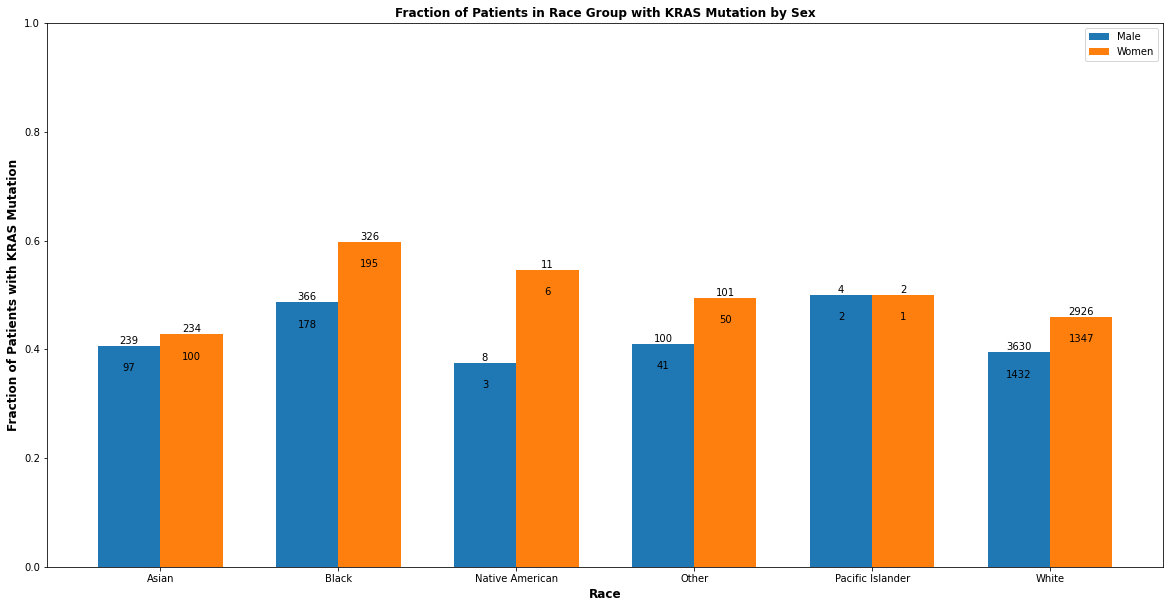

In [33]:
#Patients with KRAS mutations broken down by race, Grouped by gender
#NOTE: Race is different than ethnicity. Spanish/Hispanic is only an option in Ethnicity 

race_list = np.unique( kras_count_patient["PRIMARY_RACE"] )

race_mut = []
race_mut_female = []
race_mut_male = []
race_mut_unknown = []
total_race_list=[]
total_race_male = []
total_race_female = []
x_labels=[]

#loop through all races
for race in race_list:    
    
    #skip NA, Unknown, and Not collected races
    if race in ["Not Applicable", "Unknown", "Not collected"]:
        continue
        
    #will use to label bar graphs
    x_labels.append(race)
    
    #subset to patients of specific race
    race_df = kras_count_patient[ kras_count_patient["PRIMARY_RACE"] == race ]
    
    #total number of patients of specific race
    total_race = race_df.shape[0] 
    total_race_list.append(total_race)
    
    #breakdown of racial group into male / female
    total_race_male.append( sum( race_df["SEX"] == "Male" ) )
    total_race_female.append( sum( race_df["SEX"] == "Female" ) )
    
    #find patients with KRAS mutations 
    #calculate percentage by dividing num of patients with KRAS by total number of patients in race
    race_mut.append( sum( race_df["KRAS_MUT"] ) / total_race )
    
    #repeat with male and female
    race_mut_female.append( sum( race_df["KRAS_MUT"][ race_df["SEX"] == "Female"] ) \
                                           / sum( race_df["SEX"] == "Female" ) )
    race_mut_male.append( sum( race_df["KRAS_MUT"][race_df["SEX"] == "Male"] ) \
                                         / sum( race_df["SEX"] == "Male" ) )
 
    
#create first bar plot, overall percentage of racial group with KRAS mutation
plt.figure(figsize=(20,10))
bar1 = plt.bar( x_labels, race_mut )
plt.ylabel("Fraction of Patients with KRAS Mutation", fontsize="large", fontweight="semibold")
plt.ylim(0,1)
plt.xlabel("Race", fontsize="large", fontweight="semibold")

#label first bar plot
for i,rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, total_race_list[i], ha='center', va='bottom')
    plt.text(rect.get_x() + rect.get_width()/2.0, height-0.05, int(race_mut[i] * total_race_list[i]), \
                                                         ha='center', va='bottom')

plt.title("Fraction of Patients in Race Group with KRAS Mutation", \
                 fontweight="semibold", fontsize="large")

print( "Number on TOP of bars is total number of patients in subgroup" )
print( "Number IN bars is number of patients with KRAS mutation in subgroup" )


#show first bar plot
plt.show()

#create second bar plot, divide each racial group by sex
fig, ax = plt.subplots( figsize=(20,10) )
ind = np.arange(len(x_labels))  # the x locations for the groups
width = 0.35  # the width of the bars

bar_male = ax.bar(ind - width/2, race_mut_male, width, label='Male')
bar_female = ax.bar(ind + width/2, race_mut_female, width, label='Women')

ax.set_xlabel("Race", fontsize="large", fontweight="semibold")
ax.set_ylabel("Fraction of Patients with KRAS Mutation", fontsize="large", fontweight="semibold")
ax.set_title("Fraction of Patients in Race Group with KRAS Mutation by Sex", \
                 fontweight="semibold", fontsize="large")
ax.set_xticks(ind)
ax.set_xticklabels( x_labels )
ax.set_ylim(0,1)
ax.legend()

for i,rect in enumerate(bar_male):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, total_race_male[i], ha='center', va='bottom')
    plt.text(rect.get_x() + rect.get_width()/2.0, height-0.05, int(race_mut_male[i] * total_race_male[i]), ha='center', va='bottom')

for i,rect in enumerate(bar_female):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, total_race_female[i], ha='center', va='bottom')
    plt.text(rect.get_x() + rect.get_width()/2.0, height-0.05, int(race_mut_female[i] * total_race_female[i]), ha='center', va='bottom')

plt.show()


In [34]:
#Focus on 3 Racial Categories: Asian or Pacific Islander, Black, White
kras_count_patient.loc[ kras_count_patient["PRIMARY_RACE"] == "Asian","PRIMARY_RACE"] = "Asian or Pacific Islander"
kras_count_patient.loc[ kras_count_patient["PRIMARY_RACE"] == "Pacific Islander","PRIMARY_RACE"] = "Asian or Pacific Islander"
kras_count_patient.loc[ kras_count_patient["PRIMARY_RACE"] == "Not Applicable","PRIMARY_RACE"] = "Unknown"
kras_count_patient.loc[ kras_count_patient["PRIMARY_RACE"] == "Not collected","PRIMARY_RACE"] = "Unknown"

In [35]:
def calculate_p_values( num_mut_g1, num_no_mut_g1, num_mut_g2, num_no_mut_g2  ):
    odds, p_val = stats.fisher_exact( [[ num_no_mut_g1, num_mut_g1 ],[num_no_mut_g2, num_mut_g2]],\
                                     alternative="two-sided" )
    #The calculated odds ratio is different from the one R uses. 
    #This scipy implementation returns the (more common) “unconditional Maximum Likelihood Estimate”
    #While R uses the “conditional Maximum Likelihood Estimate”.
    
    return odds,p_val
    
def calculate_g_values( num_mut_g1, num_no_mut_g1, num_mut_g2, num_no_mut_g2 ):
    g, p, dof, expctd = stats.chi2_contingency( [[ num_no_mut_g1, num_mut_g1 ],[num_no_mut_g2, num_mut_g2]],\
                                     lambda_= "log-likelihood" )
    return p

Number on TOP of bars is total number of patients in subgroup
Number IN bars is number of patients with KRAS mutation in subgroup


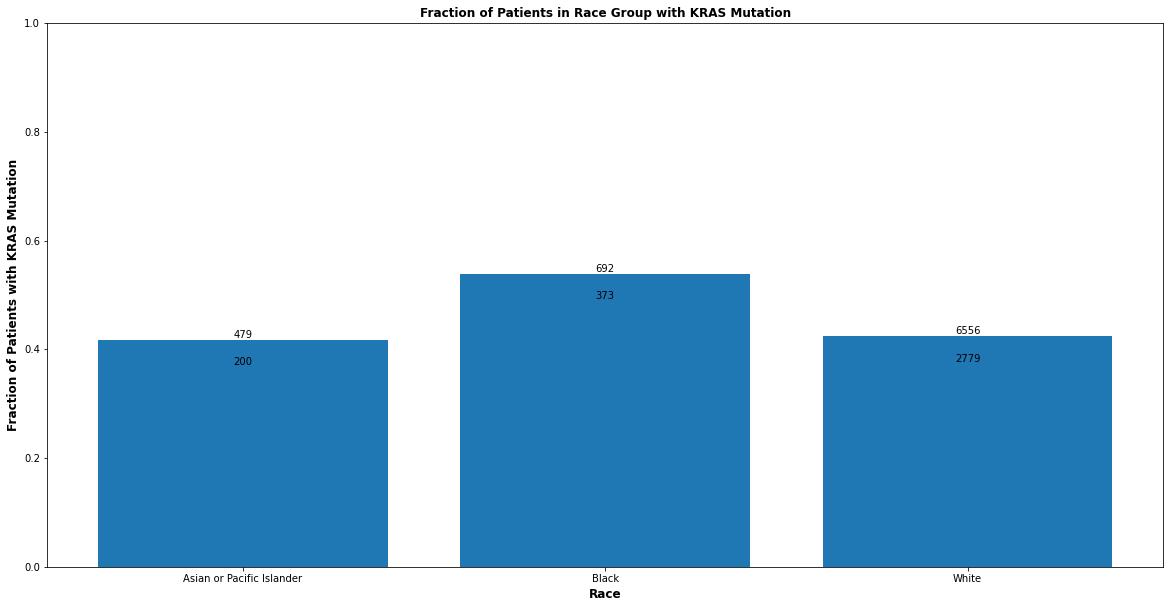

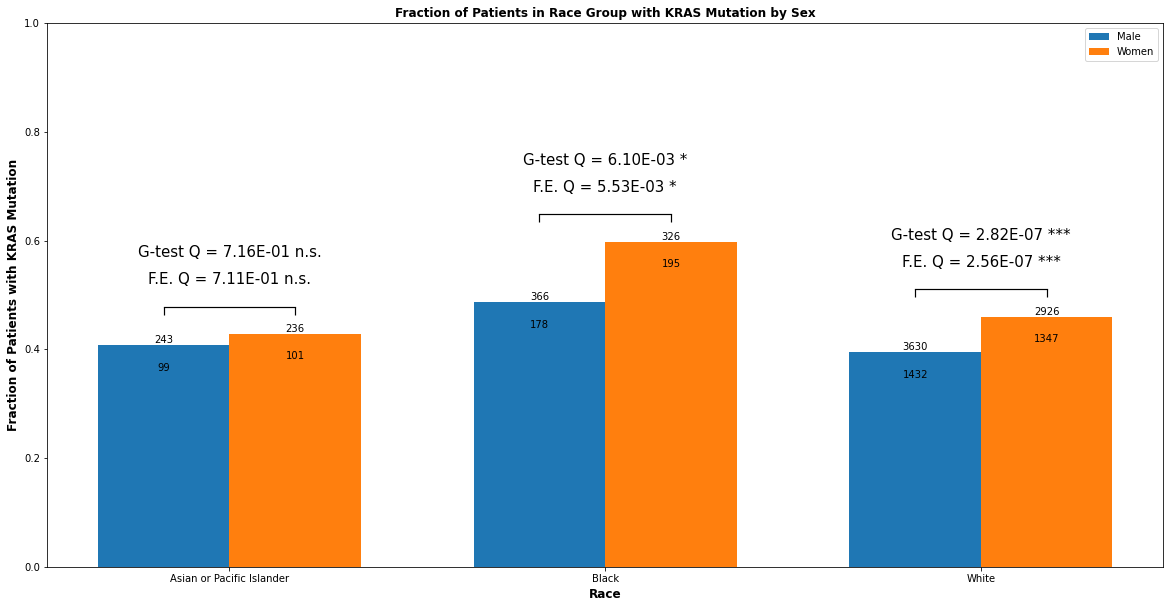

Uncorrected Fisher Exact p-values
Asian or Pacific Islander:  0.7109562537814815
Black:  0.0036854600236206287
White:  8.530535683621615e-08

Uncorrected G-test p-values
Asian or Pacific Islander:  0.7162418883448377
Black:  0.004064088562129308
White:  9.403877980976055e-08


In [36]:
#Patients with KRAS mutations broken down by race? Grouped by gender?
#NOTE: Race is different than ethnicity. Spanish/Hispanic is only an option in Ethnicity 

race_list = np.unique( kras_count_patient["PRIMARY_RACE"] )

race_mut = []
race_mut_female = []
race_mut_male = []
race_mut_unknown = []
total_race_list=[]
total_race_male = []
total_race_female = []
x_labels=[]

#loop through all races
for race in race_list:    
    
    #skip "Other" and "Unknown" race
    if race in ["Other", "Unknown", "Native American"]:
        continue
        
    #will use to label bar graphs
    x_labels.append(race)
    
    #subset to patients of specific race
    race_df = kras_count_patient[ kras_count_patient["PRIMARY_RACE"] == race ]
    
    #total number of patients of specific race
    total_race = race_df.shape[0] 
    total_race_list.append(total_race)
    
    #breakdown of racial group into male / female
    total_race_male.append( sum( race_df["SEX"] == "Male" ) )
    total_race_female.append( sum( race_df["SEX"] == "Female" ) )
    
    #find patients with KRAS mutations 
    #calculate percentage by dividing num of patients with KRAS by total number of patients in race
    race_mut.append( sum( race_df["KRAS_MUT"] ) / total_race )
    
    #repeat with male and female
    race_mut_female.append( sum( race_df["KRAS_MUT"][ race_df["SEX"] == "Female"] ) \
                                           / sum( race_df["SEX"] == "Female" ) )
    race_mut_male.append( sum( race_df["KRAS_MUT"][race_df["SEX"] == "Male"] ) \
                                         / sum( race_df["SEX"] == "Male" ) )
    
#calculate p-values
p_vals_same_race = []
g_vals_same_race = []
for i in range(len(x_labels)):
    num_mut_female = race_mut_female[i] * total_race_female[i] 
    num_no_mut_female = total_race_female[i] - num_mut_female
    num_mut_male = race_mut_male[i] * total_race_male[i] 
    num_no_mut_male = total_race_male[i] - num_mut_male
    p_vals_same_race.append( \
                calculate_p_values( num_mut_female, num_no_mut_female, num_mut_male, num_no_mut_male  )[1] )
    g_vals_same_race.append( \
                calculate_g_values(num_mut_female, num_no_mut_female, num_mut_male, num_no_mut_male  ) ) 
    

q_vals = sm.stats.multipletests( p_vals_same_race, method="fdr_bh" )[1]
g_test_q_vals = sm.stats.multipletests( g_vals_same_race, method="fdr_bh" )[1]

#create first bar plot, overall percentage of racial group with KRAS mutation
plt.figure(figsize=(20,10))
bar1 = plt.bar( x_labels, race_mut )
plt.ylabel("Fraction of Patients with KRAS Mutation", fontsize="large", fontweight="semibold")
plt.ylim(0,1)
plt.xlabel("Race", fontsize="large", fontweight="semibold")

#label first bar plot
for i,rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, total_race_list[i], ha='center', va='bottom')
    plt.text(rect.get_x() + rect.get_width()/2.0, height-0.05, int(race_mut[i] * total_race_list[i]), \
                                                         ha='center', va='bottom')

plt.title("Fraction of Patients in Race Group with KRAS Mutation", \
                 fontweight="semibold", fontsize="large")

print( "Number on TOP of bars is total number of patients in subgroup" )
print( "Number IN bars is number of patients with KRAS mutation in subgroup" )


#show first bar plot
plt.show()

#create second bar plot, divide each racial group by sex
fig, ax = plt.subplots( figsize=(20,10) )
ind = np.arange(len(x_labels))  # the x locations for the groups
width = 0.35  # the width of the bars

bar_male = ax.bar(ind - width/2, race_mut_male, width, label='Male')
bar_female = ax.bar(ind + width/2, race_mut_female, width, label='Women')

ax.set_xlabel("Race", fontsize="large", fontweight="semibold")
ax.set_ylabel("Fraction of Patients with KRAS Mutation", fontsize="large", fontweight="semibold")
ax.set_title("Fraction of Patients in Race Group with KRAS Mutation by Sex", \
                 fontweight="semibold", fontsize="large")
ax.set_xticks(ind)
ax.set_xticklabels( x_labels )
ax.set_ylim(0,1)
ax.legend()

for i,rect in enumerate(bar_male):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, total_race_male[i], ha='center', va='bottom')
    plt.text(rect.get_x() + rect.get_width()/2.0, height-0.05, int(race_mut_male[i] * total_race_male[i]), ha='center', va='bottom')

for i,rect in enumerate(bar_female):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, total_race_female[i], ha='center', va='bottom')
    plt.text(rect.get_x() + rect.get_width()/2.0, height-0.05, int(race_mut_female[i] * total_race_female[i]), ha='center', va='bottom')

    
#Annotate with q-values
offset = 0.05
for i,q in enumerate(q_vals):
    if q>=0.05:
        displaystring = r'n.s.'
    elif q<0.0001:
        displaystring = r'***'
    elif q<0.001:
        displaystring = r'**'
    else:
        displaystring = r'*'
        
    if g_test_q_vals[i]>=0.05:
        gdisplaystring = r'n.s.'
    elif g_test_q_vals[i]<0.0001:
        gdisplaystring = r'***'
    elif g_test_q_vals[i]<0.001:
        gdisplaystring = r'**'
    else:
        gdisplaystring = r'*'
        
    q_text = "F.E. Q = {:0.2E} {}".format( q_vals[i], displaystring )
    g_text = "G-test Q = {:0.2E} {}".format( g_test_q_vals[i], gdisplaystring )
    height = offset +  max( race_mut_male[i], race_mut_female[i] )
    bar_centers = ind[i] + np.array([0.5,1.5])*width
    start = bar_centers[0] - width
    end = bar_centers[1] - width
    plt.plot([start,end],[height]*2,'-',color = 'k',lw=1.2,marker = TICKDOWN,markeredgewidth=1.2,markersize = 8)
    plt.text(0.5*(start+end),height+offset,q_text,ha = 'center',va='center',bbox=dict(facecolor='1.', edgecolor='none',boxstyle='Square,pad='+str(0.3)),size = 15)
    plt.text(0.5*(start+end),height+2*offset,g_text,ha = 'center',va='center',bbox=dict(facecolor='1.', edgecolor='none',boxstyle='Square,pad='+str(0.3)),size = 15)
    
    
plt.show()

print("Uncorrected Fisher Exact p-values")
for i,r in enumerate(x_labels):
    print(r + ": ", p_vals_same_race[i])
    
print("\nUncorrected G-test p-values")
for i,r in enumerate(x_labels):
    print(r + ": ", g_vals_same_race[i])

In [37]:
#Create fisher exact table 
#Be sure to run the previous cell

rows = []

for sex in ["Female", "Male"]:
    for race in x_labels:
        r_s = race + " " + sex
        rows.append( r_s )
        
fisher = pd.DataFrame( index=rows, columns=rows )
fisher

#female / female, male / male
for i in range( int(fisher.shape[0]/2) ):
    for j in range( int(fisher.shape[0] / 2) ):
        if i <= j: 
            continue
            
        num_mut_female_i = race_mut_female[i] * total_race_female[i]
        num_no_mut_female_i = total_race_female[i] - num_mut_female_i
        num_mut_female_j = race_mut_female[j] * total_race_female[j] 
        num_no_mut_female_j = total_race_female[j] - num_mut_female_j
        
        fisher.iloc[ i, j ] = \
                calculate_p_values( num_mut_female_i, num_no_mut_female_i, num_mut_female_j, num_no_mut_female_j  )

        
        num_mut_male_i = race_mut_male[i] * total_race_male[i]
        num_no_mut_male_i = total_race_male[i] - num_mut_male_i
        num_mut_male_j = race_mut_male[j] * total_race_male[j] 
        num_no_mut_male_j = total_race_male[j] - num_mut_male_j
        

        fisher.iloc[ i+ int(fisher.shape[0]/2), j+int(fisher.shape[0]/2)] = \
                calculate_p_values( num_mut_male_i, num_no_mut_male_i, num_mut_male_j, num_no_mut_male_j  )
        

        
#male / female
for m_ind in range( int(fisher.shape[0] / 2) ):
    for f_ind in range( int(fisher.shape[0] / 2) ):
        
        num_mut_male_i = race_mut_male[m_ind] * total_race_male[m_ind]
        num_no_mut_male_i = total_race_male[m_ind] - num_mut_male_i
        num_mut_female_j = race_mut_female[f_ind] * total_race_female[f_ind] 
        num_no_mut_female_j = total_race_female[f_ind] - num_mut_female_j
        fisher.iloc[ m_ind + int(fisher.shape[0]/2), f_ind ] = \
             calculate_p_values( num_mut_male_i, num_no_mut_male_i, num_mut_female_j, num_no_mut_female_j  )

In [38]:
#df.style.format({ 'B': lambda x: '({:,.1f}, {:,.1f})'.format(*x)})
fisher
#Odds ratio, uncorrected Fisher Exact P-value
#This can be read as row compared to column
#Example: Asian Female is 0.5X likely as a Black female to have mutation 

,Asian or Pacific Islander Female,Black Female,White Female,Asian or Pacific Islander Male,Black Male,White Male
Asian or Pacific Islander Female,NaN,NaN,NaN,NaN,NaN,NaN
Black Female,"(0.5026020892687559, 8.016765859269247e-05)",NaN,NaN,NaN,NaN,NaN
White Female,"(0.8770051417415932, 0.34265844759569053)","(1.744929359560686, 2.644778630686769e-06)",NaN,NaN,NaN,NaN
Asian or Pacific Islander Male,"(1.0882154882154882, 0.7109562537814815)","(2.1651630811936156, 6.963722205810656e-06)","(1.2408313662271864, 0.12312033548036397)",NaN,NaN,NaN
Black Male,"(0.7901789429879318, 0.18050800128155542)","(1.5721760013723305, 0.0036854600236206287)","(0.9009969330610328, 0.37374990837554634)","(0.726123595505618, 0.05664454502885655)",NaN,NaN
White Male,"(1.1483447134285123, 0.33639312268168997)","(2.284798925327306, 1.5864964198178446e-12)","(1.3093933647276934, 8.530535683621615e-08)","(1.0552548882681565, 0.6849790400621437)","(1.4532717223344824, 0.0007776767248724504)",NaN


In [39]:
#FDR Corrected P-Values
#Be sure to run all previous cells 
fisher_corrected = pd.DataFrame( index= list(fisher.index), columns = list(fisher.columns) )
p_vals = []
for i in range(fisher.shape[0]):
    for j in range(fisher.shape[0]):
        if j >= i:
            continue
        p_vals.append( fisher.iloc[i,j][1] )

q_vals = sm.stats.multipletests( p_vals, method="fdr_bh" )[1]

q_ind = 0
for i in range(fisher.shape[0]):
    for j in range(fisher.shape[0]):
        if j >= i:
            continue
        fisher_corrected.iloc[i,j] = q_vals[q_ind]
        q_ind += 1

In [40]:
#Notice: These corrected values are slightly different than the bar graph
#This is because the bar graph values were just corrected with those three p-values
#Here, all 15 p-values were used in the correction
pd.set_option('display.float_format', '{:.3E}'.format)
fisher_corrected

,Asian or Pacific Islander Female,Black Female,White Female,Asian or Pacific Islander Male,Black Male,White Male
Asian or Pacific Islander Female,NaN,NaN,NaN,NaN,NaN,NaN
Black Female,2.405E-04,NaN,NaN,NaN,NaN,NaN
White Female,4.283E-01,1.322E-05,NaN,NaN,NaN,NaN
Asian or Pacific Islander Male,7.110E-01,2.611E-05,2.052E-01,NaN,NaN,NaN
Black Male,2.708E-01,7.897E-03,4.312E-01,1.062E-01,NaN,NaN
White Male,4.283E-01,2.380E-11,6.398E-07,7.110E-01,1.944E-03,NaN


In [41]:
######NOW LOOKING AT SPECIFIC KRAS MUTATION G12C ########
#QUESTION: KRAS VS NRAS? NRAS also had a few G12C mutations. Does this make sense?

In [42]:
hgvs_sample = pd.read_csv("../GENIE_data/GENIE_v8/genie_v8_kras_mutation_hgvs_sample.csv", index_col=0)
hgvs_patient = pd.read_csv("../GENIE_data/GENIE_v8/genie_v8_kras_mutation_hgvs_patient.csv", index_col=0)

In [43]:
hgvs_sample

,KRAS_COUNT,PATIENT_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED,CENTER,SEX,PRIMARY_RACE,ETHNICITY,CENTER.1,p.G12C_PRESENT
GENIE-COLU-00079-01,1,GENIE-COLU-00079,74,COAD,Primary,COLU-CCCP-V1,Colorectal Cancer,Colon Adenocarcinoma,Primary tumor,COLU,Female,Unknown,Unknown,COLU,False
GENIE-COLU-00086-01,1,GENIE-COLU-00086,65,READ,Metastasis,COLU-CCCP-V1,Colorectal Cancer,Rectal Adenocarcinoma,Lymph node metastasis,COLU,Female,Black,Non-Spanish/non-Hispanic,COLU,False
GENIE-COLU-00100-01,1,GENIE-COLU-00100,59,COAD,Primary,COLU-CCCP-V1,Colorectal Cancer,Colon Adenocarcinoma,Primary tumor,COLU,Male,Unknown,Unknown,COLU,False
GENIE-COLU-00179-01,1,GENIE-COLU-00179,31,COADREAD,Metastasis,COLU-CCCP-V1,Colorectal Cancer,Colorectal Adenocarcinoma,Distant organ metastasis,COLU,Female,Asian,Unknown,COLU,False
GENIE-COLU-00195-01,0,GENIE-COLU-00195,84,READ,Unspecified,COLU-CCCP-V1,Colorectal Cancer,Rectal Adenocarcinoma,Not otherwise specified,COLU,Male,Unknown,Unknown,COLU,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GENIE-YALE-TPL648-1,1,GENIE-YALE-TPL648,47,COAD,Metastasis,YALE-OCP-V3,Colorectal Cancer,Colon Adenocarcinoma,Distant organ metastasis,YALE,Male,White,Non-Spanish/non-Hispanic,YALE,False
GENIE-YALE-TPL75-1,0,GENIE-YALE-TPL75,58,COADREAD,Metastasis,YALE-HSM-V1,Colorectal Cancer,Colorectal Adenocarcinoma,Distant organ metastasis,YALE,Male,Unknown,Non-Spanish/non-Hispanic,YALE,False
GENIE-YALE-TPL82-1,0,GENIE-YALE-TPL82,62,COAD,Primary,YALE-HSM-V1,Colorectal Cancer,Colon Adenocarcinoma,Primary tumor,YALE,Female,White,Non-Spanish/non-Hispanic,YALE,False
GENIE-YALE-TPL91-1,1,GENIE-YALE-TPL91,72,READ,Primary,YALE-HSM-V1,Colorectal Cancer,Rectal Adenocarcinoma,Primary tumor,YALE,Male,White,Non-Spanish/non-Hispanic,YALE,False


In [44]:
hgvs_patient

,KRAS_MUT,SEX,PRIMARY_RACE,ETHNICITY,CENTER,NUM_SAMP,SAMP_CONSIS,p.G12C_PRESENT
GENIE-VICC-102225,False,Female,White,Non-Spanish/non-Hispanic,VICC,1,True,False
GENIE-VICC-108156,True,Female,White,Non-Spanish/non-Hispanic,VICC,1,True,False
GENIE-VICC-111844,True,Female,White,Unknown,VICC,1,True,False
GENIE-VICC-113062,False,Male,White,Unknown,VICC,1,True,False
GENIE-VICC-114230,False,Female,Black,Non-Spanish/non-Hispanic,VICC,1,True,False
...,...,...,...,...,...,...,...,...
GENIE-PHS-c28542d1,True,Female,White,Spanish/Hispanic,PHS,1,True,False
GENIE-PHS-d186889f,False,Female,Asian,Spanish/Hispanic,PHS,1,True,False
GENIE-PHS-f2586482,False,Male,White,Spanish/Hispanic,PHS,1,True,False
GENIE-PHS-f53567c6,True,Male,White,Spanish/Hispanic,PHS,1,True,False


In [45]:
sum(hgvs_patient["p.G12C_PRESENT"])
#279 patients have the KRAS G12C mutation

279

In [46]:
#Focus on 3 Racial Categories: Asian or Pacific Islander, Black, White
hgvs_patient.loc[ hgvs_patient["PRIMARY_RACE"] == "Asian","PRIMARY_RACE"] = "Asian or Pacific Islander"
hgvs_patient.loc[ hgvs_patient["PRIMARY_RACE"] == "Pacific Islander","PRIMARY_RACE"] = "Asian or Pacific Islander"
hgvs_patient.loc[ hgvs_patient["PRIMARY_RACE"] == "Not Applicable","PRIMARY_RACE"] = "Unknown"
hgvs_patient.loc[ hgvs_patient["PRIMARY_RACE"] == "Not collected","PRIMARY_RACE"] = "Unknown"

Number on TOP of bars is total number of patients in subgroup
Number IN bars is number of patients with KRAS G12C mutation in subgroup


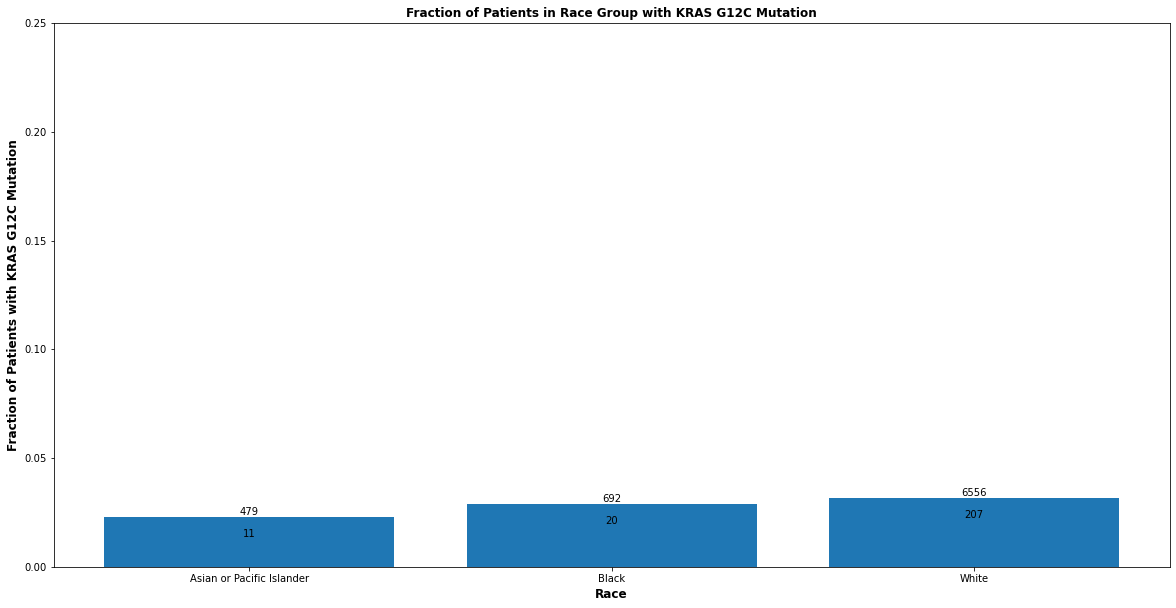

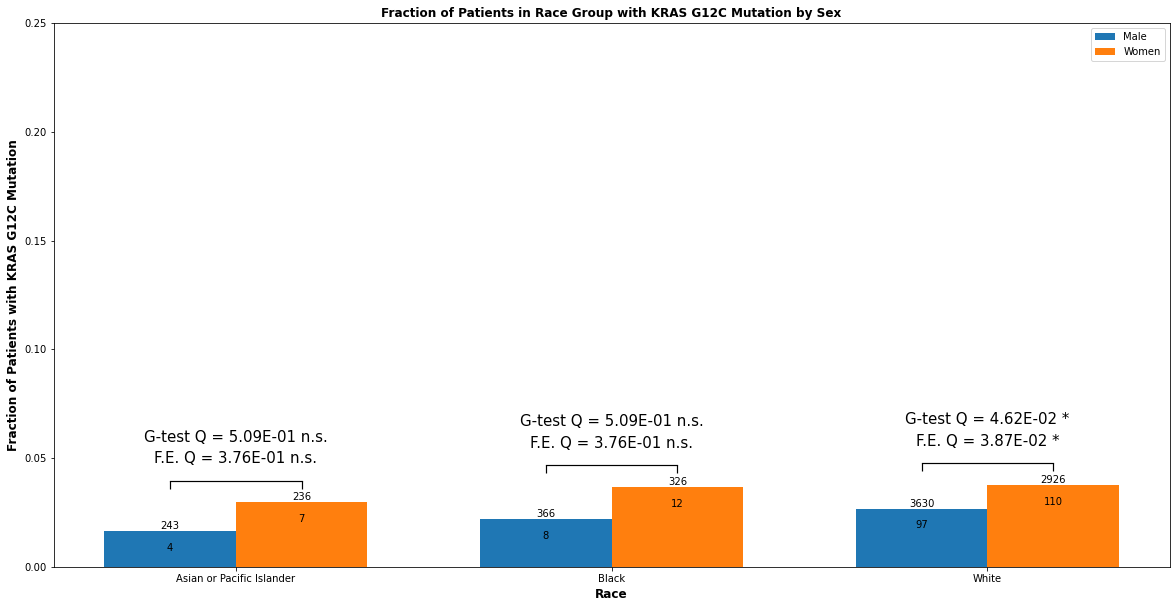

Uncorrected Fisher Exact p-values
Asian or Pacific Islander:  0.37589477043886904
Black:  0.2633340300522231
White:  0.012900535570159858

Uncorrected G-test p-values
Asian or Pacific Islander:  0.5088387769981422
Black:  0.34503227466637176
White:  0.015394570051954137


In [48]:
#Patients with KRAS mutations broken down by race? Grouped by gender?
#NOTE: Race is different than ethnicity. Spanish/Hispanic is only an option in Ethnicity 

race_list = np.unique( hgvs_patient["PRIMARY_RACE"] )

race_mut = []
race_mut_female = []
race_mut_male = []
race_mut_unknown = []
total_race_list=[]
total_race_male = []
total_race_female = []
x_labels=[]

#loop through all races
for race in race_list:    
    
    #skip "Other" and "Unknown" race
    if race in ["Other", "Unknown", "Native American"]:
        continue
        
    #will use to label bar graphs
    x_labels.append(race)
    
    #subset to patients of specific race
    race_df = hgvs_patient[ hgvs_patient["PRIMARY_RACE"] == race ]
    
    #total number of patients of specific race
    total_race = race_df.shape[0] 
    total_race_list.append(total_race)
    
    #breakdown of racial group into male / female
    total_race_male.append( sum( race_df["SEX"] == "Male" ) )
    total_race_female.append( sum( race_df["SEX"] == "Female" ) )
    
    #find patients with KRAS mutations 
    #calculate percentage by dividing num of patients with KRAS by total number of patients in race
    race_mut.append( sum( race_df["p.G12C_PRESENT"] ) / total_race )
    
    #repeat with male and female
    race_mut_female.append( sum( race_df["p.G12C_PRESENT"][ race_df["SEX"] == "Female"] ) \
                                           / sum( race_df["SEX"] == "Female" ) )
    race_mut_male.append( sum( race_df["p.G12C_PRESENT"][race_df["SEX"] == "Male"] ) \
                                         / sum( race_df["SEX"] == "Male" ) )
    
#calculate p-values
p_vals_same_race = []
g_vals_same_race = []
for i in range(len(x_labels)):
    num_mut_female = race_mut_female[i] * total_race_female[i] 
    num_no_mut_female = total_race_female[i] - num_mut_female
    num_mut_male = race_mut_male[i] * total_race_male[i] 
    num_no_mut_male = total_race_male[i] - num_mut_male
    p_vals_same_race.append( \
                calculate_p_values( num_mut_female, num_no_mut_female, num_mut_male, num_no_mut_male  )[1] )
    g_vals_same_race.append( \
                calculate_g_values(num_mut_female, num_no_mut_female, num_mut_male, num_no_mut_male  ) ) 
    

q_vals = sm.stats.multipletests( p_vals_same_race, method="fdr_bh" )[1]
g_test_q_vals = sm.stats.multipletests( g_vals_same_race, method="fdr_bh" )[1]

#create first bar plot, overall percentage of racial group with KRAS mutation
plt.figure(figsize=(20,10))
bar1 = plt.bar( x_labels, race_mut )
plt.ylabel("Fraction of Patients with KRAS G12C Mutation", fontsize="large", fontweight="semibold")
plt.ylim(0,0.25)
plt.xlabel("Race", fontsize="large", fontweight="semibold")

#label first bar plot
for i,rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, total_race_list[i], ha='center', va='bottom')
    plt.text(rect.get_x() + rect.get_width()/2.0, height-0.01, int(race_mut[i] * total_race_list[i]), \
                                                         ha='center', va='bottom')

plt.title("Fraction of Patients in Race Group with KRAS G12C Mutation", \
                 fontweight="semibold", fontsize="large")

print( "Number on TOP of bars is total number of patients in subgroup" )
print( "Number IN bars is number of patients with KRAS G12C mutation in subgroup" )


#show first bar plot
plt.show()

#create second bar plot, divide each racial group by sex
fig, ax = plt.subplots( figsize=(20,10) )
ind = np.arange(len(x_labels))  # the x locations for the groups
width = 0.35  # the width of the bars

bar_male = ax.bar(ind - width/2, race_mut_male, width, label='Male')
bar_female = ax.bar(ind + width/2, race_mut_female, width, label='Women')

ax.set_xlabel("Race", fontsize="large", fontweight="semibold")
ax.set_ylabel("Fraction of Patients with KRAS G12C Mutation", fontsize="large", fontweight="semibold")
ax.set_title("Fraction of Patients in Race Group with KRAS G12C Mutation by Sex", \
                 fontweight="semibold", fontsize="large")
ax.set_xticks(ind)
ax.set_xticklabels( x_labels )
ax.set_ylim(0,0.25)
ax.legend()

for i,rect in enumerate(bar_male):
    height = rect.get_height() 
    plt.text(rect.get_x() + rect.get_width()/2.0, height, total_race_male[i], ha='center', va='bottom')
    plt.text(rect.get_x() + rect.get_width()/2.0, height-0.01, int(race_mut_male[i] * total_race_male[i]), ha='center', va='bottom')

for i,rect in enumerate(bar_female):
    height = rect.get_height() 
    plt.text(rect.get_x() + rect.get_width()/2.0, height, total_race_female[i], ha='center', va='bottom')
    plt.text(rect.get_x() + rect.get_width()/2.0, height-0.01, int(race_mut_female[i] * total_race_female[i]), ha='center', va='bottom')

    
#Annotate with q-values
offset = 0.01
for i,q in enumerate(q_vals):
    if q>=0.05:
        displaystring = r'n.s.'
    elif q<0.0001:
        displaystring = r'***'
    elif q<0.001:
        displaystring = r'**'
    else:
        displaystring = r'*'
        
    if g_test_q_vals[i]>=0.05:
        gdisplaystring = r'n.s.'
    elif g_test_q_vals[i]<0.0001:
        gdisplaystring = r'***'
    elif g_test_q_vals[i]<0.001:
        gdisplaystring = r'**'
    else:
        gdisplaystring = r'*'
        
    q_text = "F.E. Q = {:0.2E} {}".format( q_vals[i], displaystring )
    g_text = "G-test Q = {:0.2E} {}".format( g_test_q_vals[i], gdisplaystring )
    height = offset +  max( race_mut_male[i], race_mut_female[i] )
    bar_centers = ind[i] + np.array([0.5,1.5])*width
    start = bar_centers[0] - width
    end = bar_centers[1] - width
    plt.plot([start,end],[height]*2,'-',color = 'k',lw=1.2,marker = TICKDOWN,markeredgewidth=1.2,markersize = 8)
    plt.text(0.5*(start+end),height+offset,q_text,ha = 'center',va='center',bbox=dict(facecolor='1.', edgecolor='none',boxstyle='Square,pad='+str(0.3)),size = 15)
    plt.text(0.5*(start+end),height+2*offset,g_text,ha = 'center',va='center',bbox=dict(facecolor='1.', edgecolor='none',boxstyle='Square,pad='+str(0.3)),size = 15)
    
    
plt.show()

print("Uncorrected Fisher Exact p-values")
for i,r in enumerate(x_labels):
    print(r + ": ", p_vals_same_race[i])
    
print("\nUncorrected G-test p-values")
for i,r in enumerate(x_labels):
    print(r + ": ", g_vals_same_race[i])

In [49]:
#Create fisher exact table 
#Be sure to run the previous cell

rows = []

for sex in ["Female", "Male"]:
    for race in x_labels:
        r_s = race + " " + sex
        rows.append( r_s )
        
fisher = pd.DataFrame( index=rows, columns=rows )
fisher

#female / female, male / male
for i in range( int(fisher.shape[0]/2) ):
    for j in range( int(fisher.shape[0] / 2) ):
        if i <= j: 
            continue
            
        num_mut_female_i = race_mut_female[i] * total_race_female[i]
        num_no_mut_female_i = total_race_female[i] - num_mut_female_i
        num_mut_female_j = race_mut_female[j] * total_race_female[j] 
        num_no_mut_female_j = total_race_female[j] - num_mut_female_j
        
        fisher.iloc[ i, j ] = \
                calculate_p_values( num_mut_female_i, num_no_mut_female_i, num_mut_female_j, num_no_mut_female_j  )

        
        num_mut_male_i = race_mut_male[i] * total_race_male[i]
        num_no_mut_male_i = total_race_male[i] - num_mut_male_i
        num_mut_male_j = race_mut_male[j] * total_race_male[j] 
        num_no_mut_male_j = total_race_male[j] - num_mut_male_j
        

        fisher.iloc[ i+ int(fisher.shape[0]/2), j+int(fisher.shape[0]/2)] = \
                calculate_p_values( num_mut_male_i, num_no_mut_male_i, num_mut_male_j, num_no_mut_male_j  )
        

        
#male / female
for m_ind in range( int(fisher.shape[0] / 2) ):
    for f_ind in range( int(fisher.shape[0] / 2) ):
        
        num_mut_male_i = race_mut_male[m_ind] * total_race_male[m_ind]
        num_no_mut_male_i = total_race_male[m_ind] - num_mut_male_i
        num_mut_female_j = race_mut_female[f_ind] * total_race_female[f_ind] 
        num_no_mut_female_j = total_race_female[f_ind] - num_mut_female_j
        fisher.iloc[ m_ind + int(fisher.shape[0]/2), f_ind ] = \
             calculate_p_values( num_mut_male_i, num_no_mut_male_i, num_mut_female_j, num_no_mut_female_j  )

In [50]:
fisher

,Asian or Pacific Islander Female,Black Female,White Female,Asian or Pacific Islander Male,Black Male,White Male
Asian or Pacific Islander Female,NaN,NaN,NaN,NaN,NaN,NaN
Black Female,"(0.7998544395924309, 0.8139695169118943)",NaN,NaN,NaN,NaN,NaN
White Female,"(0.7825327510917031, 0.7187940424061154)","(0.978343949044586, 1.0)",NaN,NaN,NaN,NaN
Asian or Pacific Islander Male,"(1.8264192139737991, 0.37589477043886904)","(2.28343949044586, 0.20083203657779247)","(2.333984375, 0.10493825976928647)",NaN,NaN,NaN
Black Male,"(1.3679039301310043, 0.5975667667219634)","(1.7101910828025477, 0.2633340300522231)","(1.748046875, 0.13742437679284936)","(0.7489539748953975, 0.7708967734545205)",NaN,NaN
White Male,"(1.1133570431729167, 0.6804947398514849)","(1.391949569899534, 0.2870856190267678)","(1.4227609536082475, 0.012900535570159858)","(0.6095846094120692, 0.41039987883659057)","(0.8139146460865058, 0.7314127468064275)",NaN


In [51]:
#FDR Corrected P-Values
#Be sure to run all previous cells 
fisher_corrected = pd.DataFrame( index= list(fisher.index), columns = list(fisher.columns) )
p_vals = []
for i in range(fisher.shape[0]):
    for j in range(fisher.shape[0]):
        if j >= i:
            continue
        p_vals.append( fisher.iloc[i,j][1] )

q_vals = sm.stats.multipletests( p_vals, method="fdr_bh" )[1]

q_ind = 0
for i in range(fisher.shape[0]):
    for j in range(fisher.shape[0]):
        if j >= i:
            continue
        fisher_corrected.iloc[i,j] = q_vals[q_ind]
        q_ind += 1

In [52]:
#Notice: These corrected values are slightly different than the bar graph
#This is because the bar graph values were just corrected with those three p-values
#Here, all 15 p-values were used in the correction
pd.set_option('display.float_format', '{:.3E}'.format)
fisher_corrected

,Asian or Pacific Islander Female,Black Female,White Female,Asian or Pacific Islander Male,Black Male,White Male
Asian or Pacific Islander Female,NaN,NaN,NaN,NaN,NaN,NaN
Black Female,8.721E-01,NaN,NaN,NaN,NaN,NaN
White Female,8.721E-01,1.000E+,NaN,NaN,NaN,NaN
Asian or Pacific Islander Male,7.695E-01,7.177E-01,6.871E-01,NaN,NaN,NaN
Black Male,8.721E-01,7.177E-01,6.871E-01,8.721E-01,NaN,NaN
White Male,8.721E-01,7.177E-01,1.935E-01,7.695E-01,8.721E-01,NaN
